In [1]:
import cv2
import easyocr
from ultralytics import YOLO
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import time

In [2]:
# Provide your video file path here
video_path = r'C:\Users\LENOVO\Desktop\Proffesional journey &Projects\data Analytics projects\number plate detection\2103099-uhd_3840_2160_30fps.mp4'
  # <-- Replace this with your video file
cap = cv2.VideoCapture(video_path)

In [3]:
# Load YOLOv8 model (replace with your model file path)
model = YOLO('yolov8n.pt') 

In [4]:
# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
# Output video settings
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('anpr_output2.avi', cv2.VideoWriter_fourcc(*'XVID'), 20, (frame_width, frame_height))

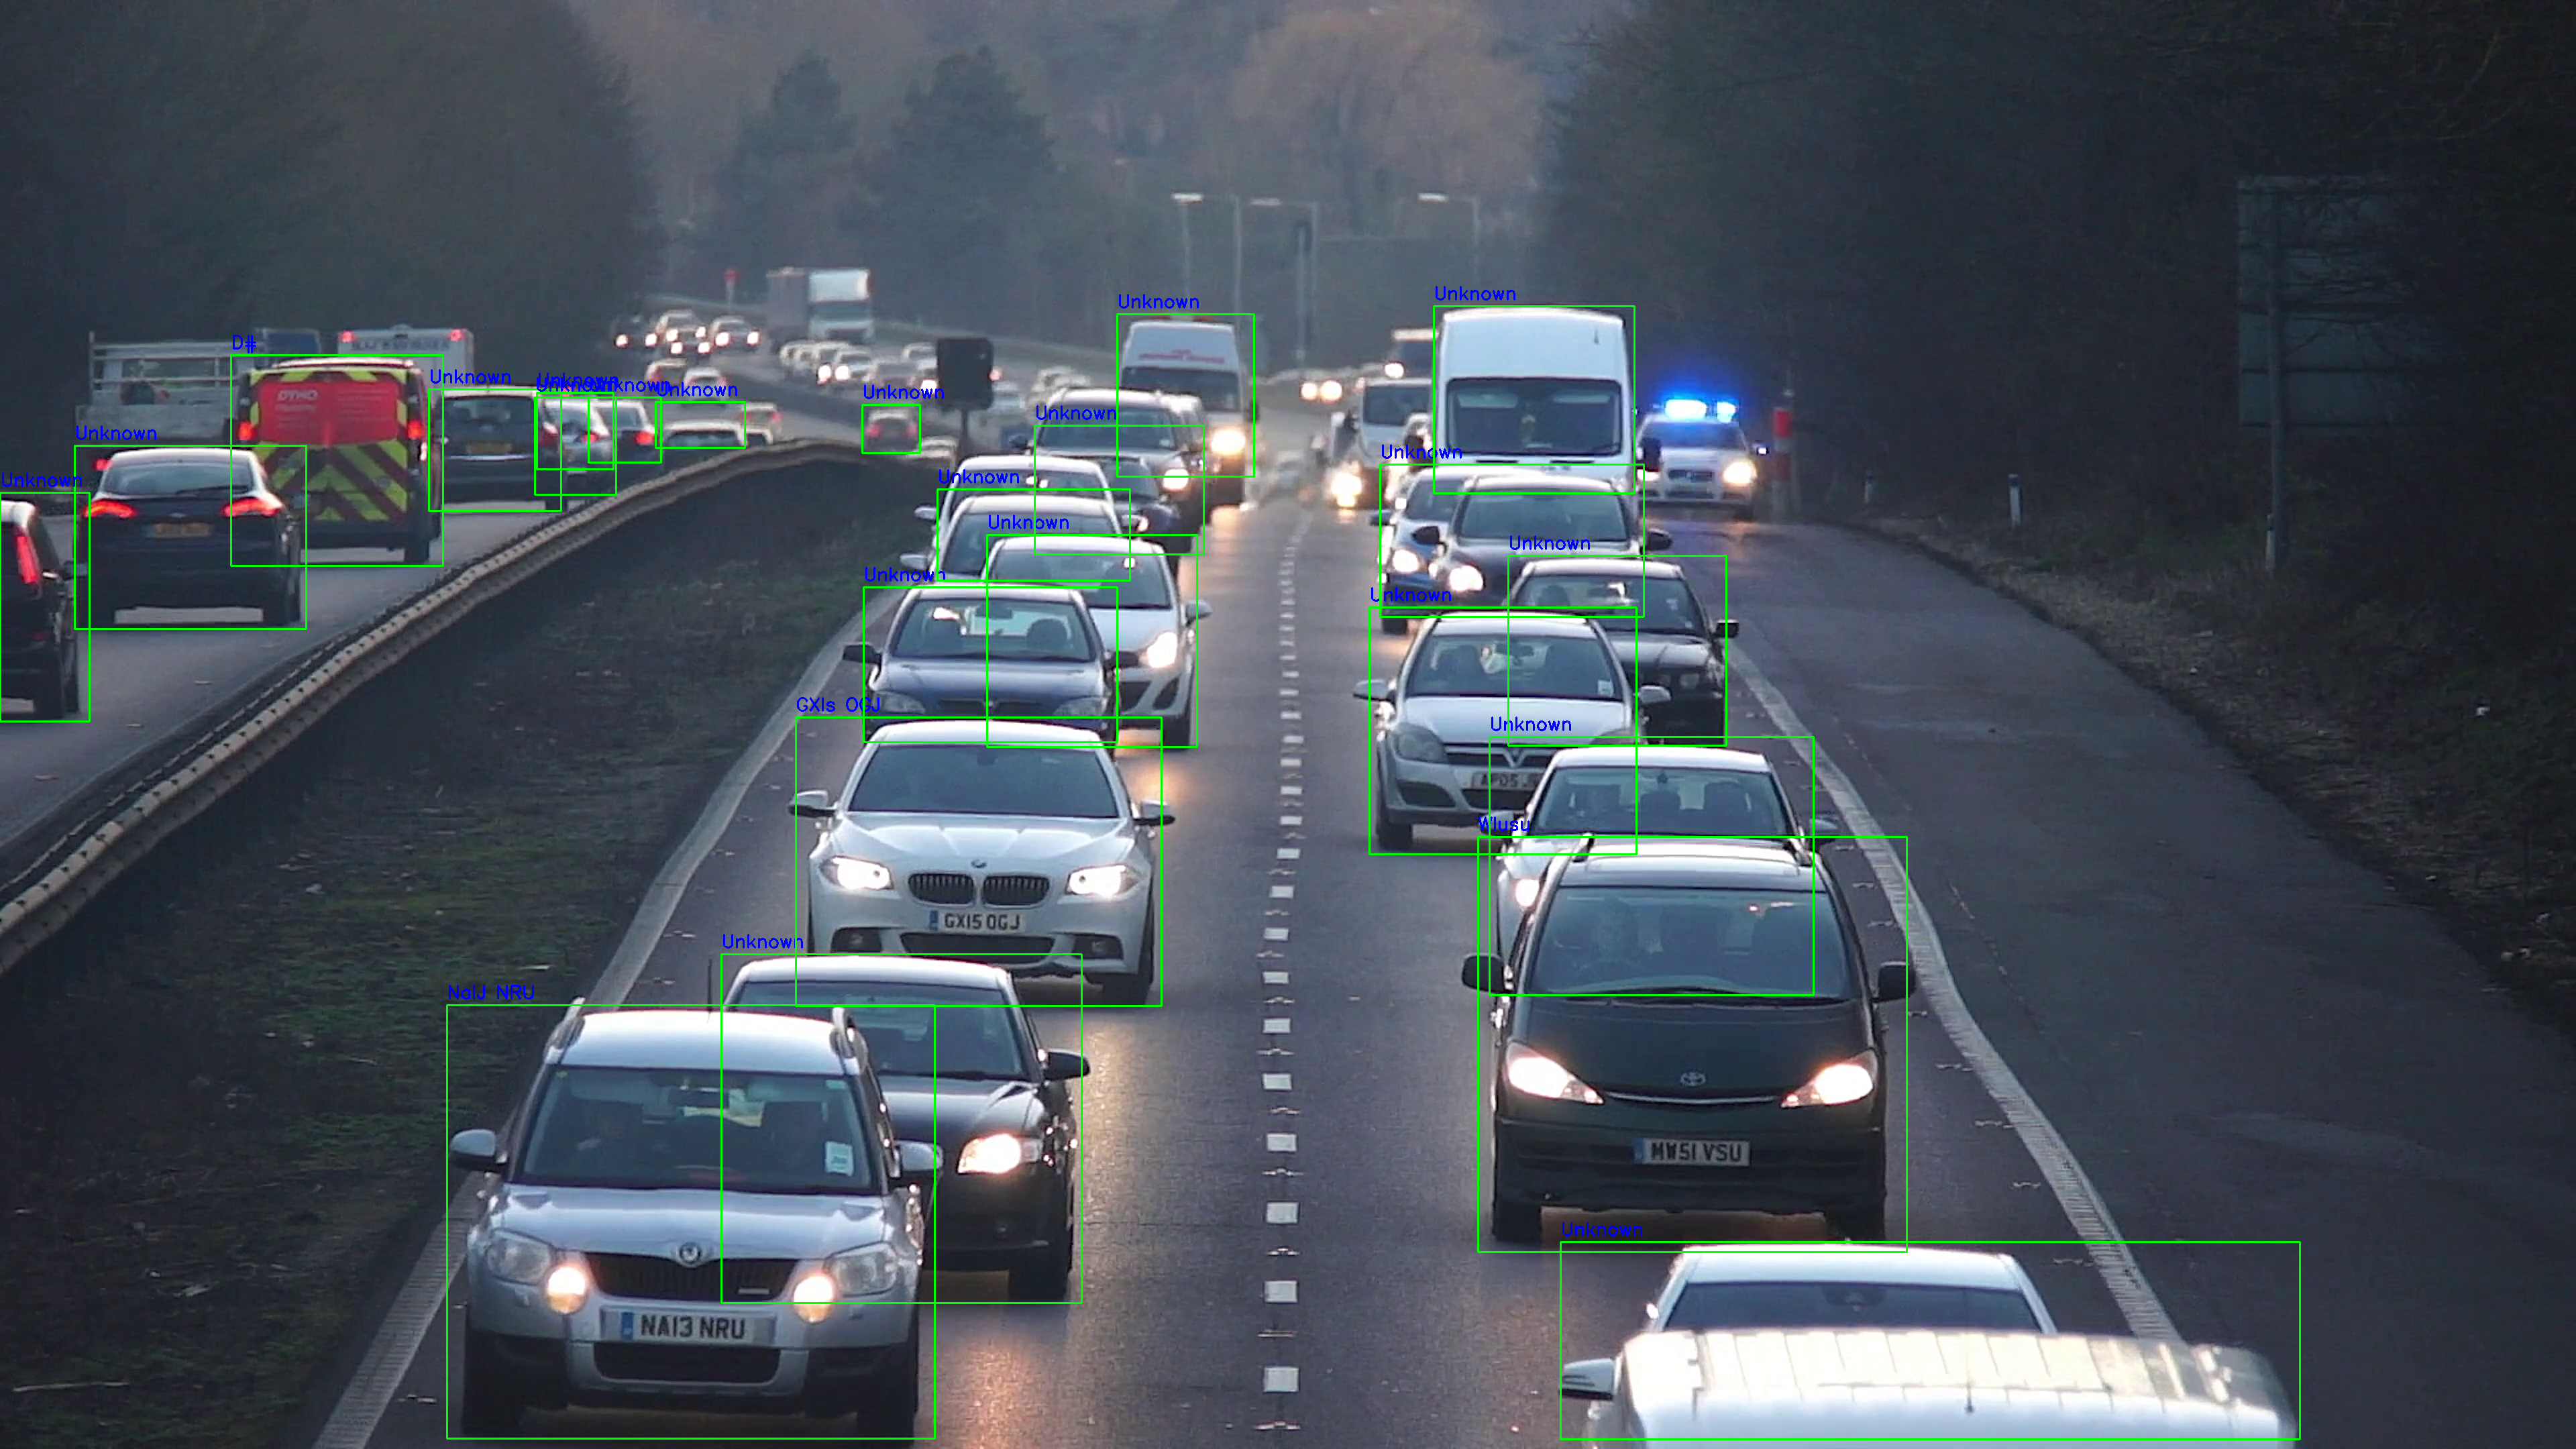


0: 384x640 22 cars, 1 bus, 2 trucks, 86.5ms
Speed: 3.3ms preprocess, 86.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)[0]
        annotated_frame = frame.copy()

        for box in results.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cropped = frame[y1:y2, x1:x2]
            text = reader.readtext(cropped, detail=0)
            plate = text[0] if text else "Unknown"

            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_frame, plate, (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        out.write(annotated_frame)

        # Show the result inside Jupyter
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(annotated_frame_rgb)
        clear_output(wait=True)
        display(pil_img)

        time.sleep(0.03)

except KeyboardInterrupt:
    print("Interrupted by user.")

finally:
    cap.release()
    out.release()
    cv2.destroyAllWindows()